In [4]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [5]:
# Creating dataframe 
dataframe = pd.read_csv("../data/traffic.csv")

# drop null values
df = dataframe.dropna()

In [6]:
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [7]:
df.shape

(48120, 4)

In [8]:
df.isnull().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

In [9]:
# Data description
df.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [10]:
df.groupby('Junction').count()

,DateTime,Vehicles,ID
Junction,,,
1,14592,14592,14592
2,14592,14592,14592
3,14592,14592,14592
4,4344,4344,4344


In [11]:
df.dtypes

DateTime    object
Junction     int64
Vehicles     int64
ID           int64
dtype: object

In [12]:
df['DateTime'] = df['DateTime'].astype('datetime64[ms]')

In [13]:
df['Time'] = df["DateTime"].dt.time

In [14]:
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

In [15]:
df['Month-Day'] = df['DateTime'].dt.strftime('%m-%d')

In [16]:
df['Day-of-Week'] = df['DateTime'].dt.day_of_week

In [17]:
df['Year'] = df['DateTime'].dt.strftime('%Y')

In [18]:
df = df.drop(columns='ID')

In [19]:
df['Month'] = df['DateTime'].dt.strftime('%m')

In [20]:
df['Day'] = df['DateTime'].dt.strftime('%d')

In [21]:
df["Month-Day"] = df['Month-Day'].str.replace("-","").astype(int)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DateTime     48120 non-null  datetime64[ms]
 1   Junction     48120 non-null  int64         
 2   Vehicles     48120 non-null  int64         
 3   Time         48120 non-null  object        
 4   Hour         48120 non-null  int32         
 5   Month-Day    48120 non-null  int32         
 6   Day-of-Week  48120 non-null  int32         
 7   Year         48120 non-null  object        
 8   Month        48120 non-null  object        
 9   Day          48120 non-null  object        
dtypes: datetime64[ms](1), int32(3), int64(2), object(4)
memory usage: 3.1+ MB


In [23]:
df.to_csv('../data/cleaned_data.csv')

In [21]:
junction_grouped = df.groupby('Junction')
df_junc1 = junction_grouped.get_group(1)
df_junc2 = junction_grouped.get_group(2)
df_junc3 = junction_grouped.get_group(3)
df_junc4 = junction_grouped.get_group(4)

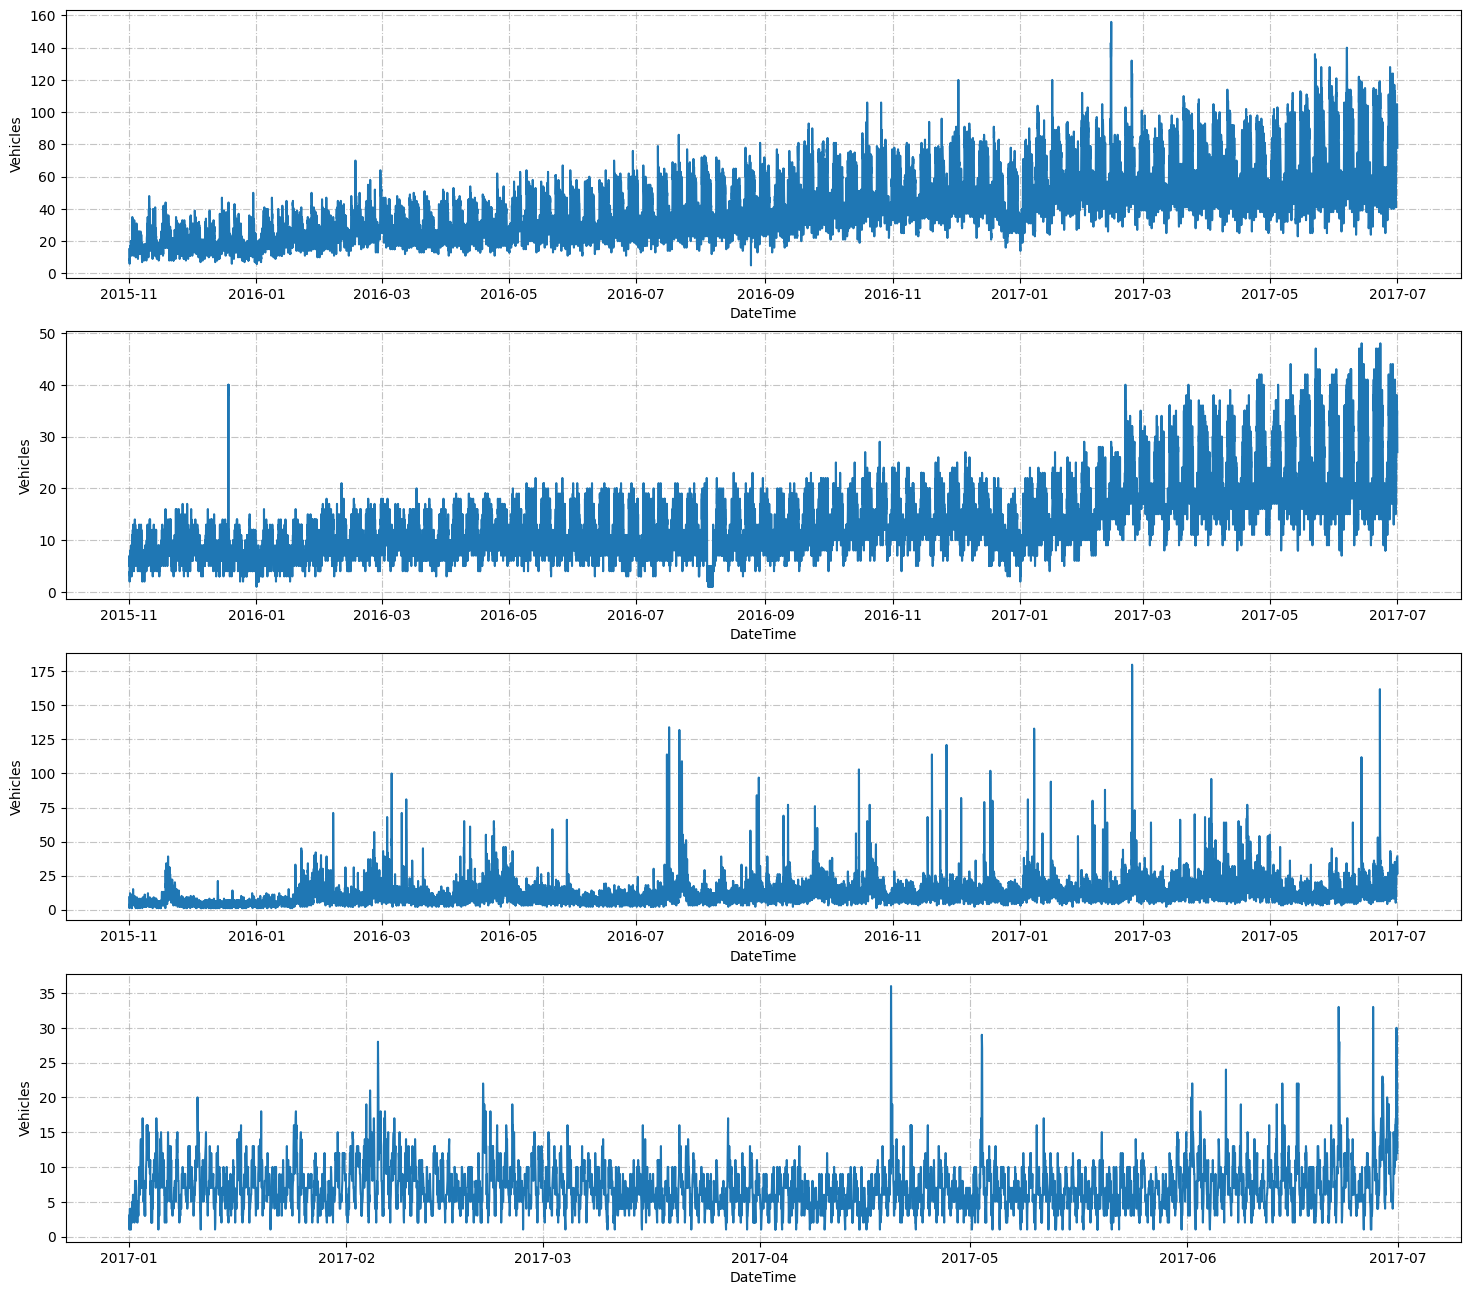

In [22]:
f, axes = plt.subplots(4,figsize=(18, 16))
sns.lineplot(ax=axes[0], data=df_junc1, y='Vehicles', x='DateTime')
sns.lineplot(ax=axes[1], data=df_junc2, y='Vehicles', x='DateTime')
sns.lineplot(ax=axes[2], data=df_junc3, y='Vehicles', x='DateTime')
sns.lineplot(ax=axes[3], data=df_junc4, y='Vehicles', x='DateTime')
for i in range(4):
    axes[i].grid(True, alpha=0.75, ls='-.')
plt.show()

In [23]:
list(df['Year'].unique())

['2015', '2016', '2017']

In [24]:
year_grouped = df_junc1.groupby('Year')
df_2015 = year_grouped.get_group('2015')
df_2016 = year_grouped.get_group('2016')
df_2017 = year_grouped.get_group('2017')

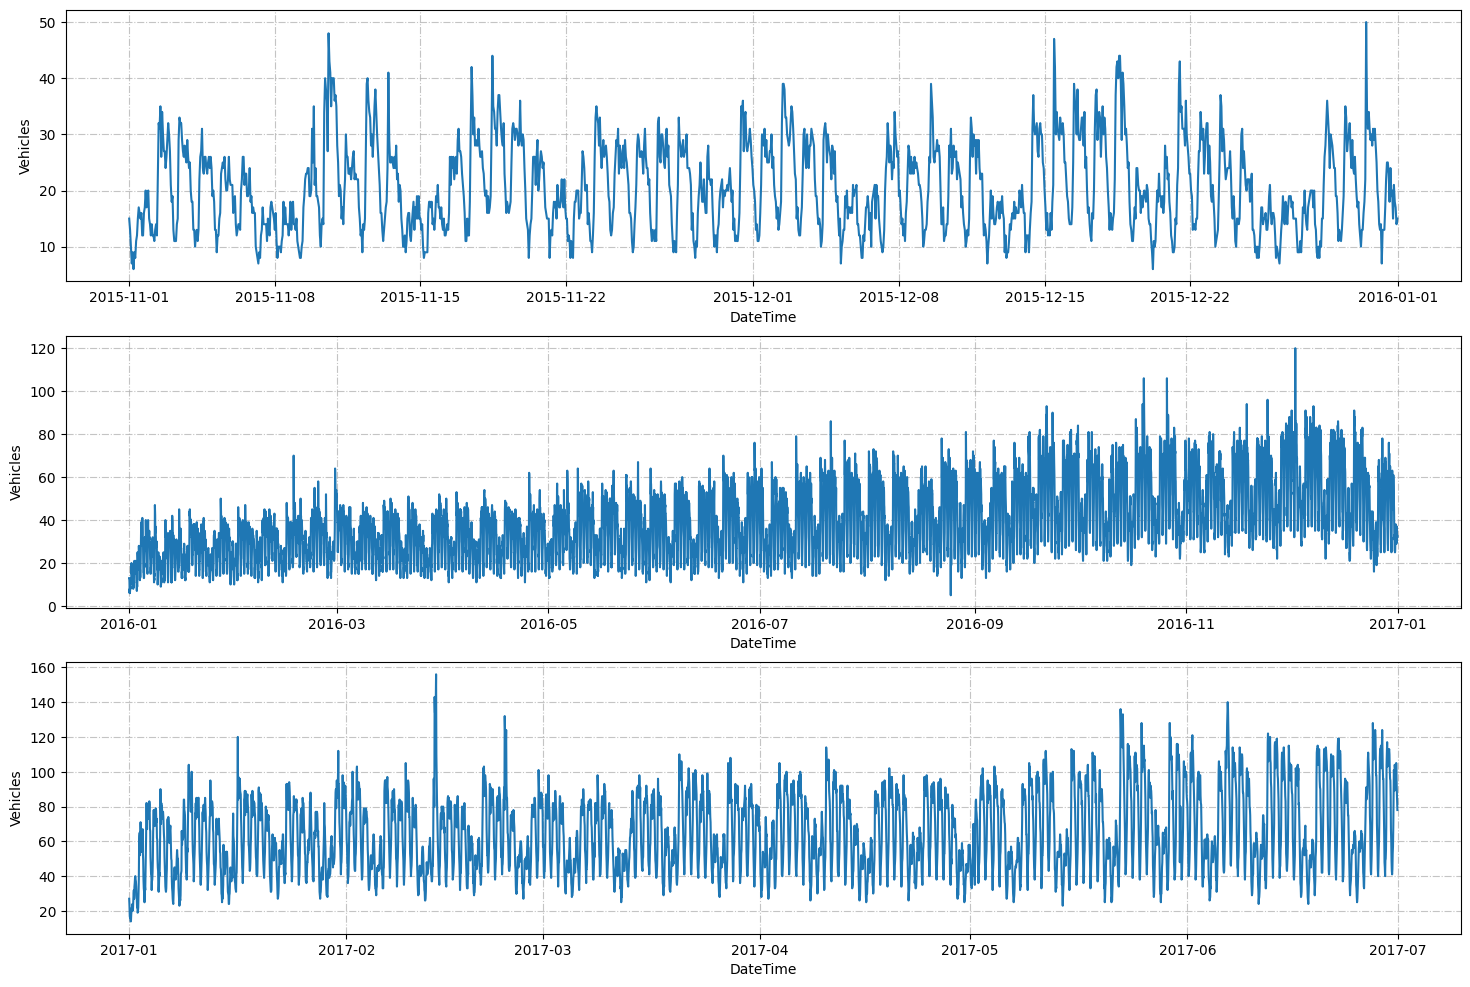

In [25]:
f, axes = plt.subplots(3,figsize=(18, 12))
sns.lineplot(ax=axes[0], data=df_2015, y='Vehicles', x='DateTime')
sns.lineplot(ax=axes[1], data=df_2016, y='Vehicles', x='DateTime')
sns.lineplot(ax=axes[2], data=df_2017, y='Vehicles', x='DateTime')
for i in range(3):
    axes[i].grid(True, alpha=0.75, ls='-.')
plt.show()

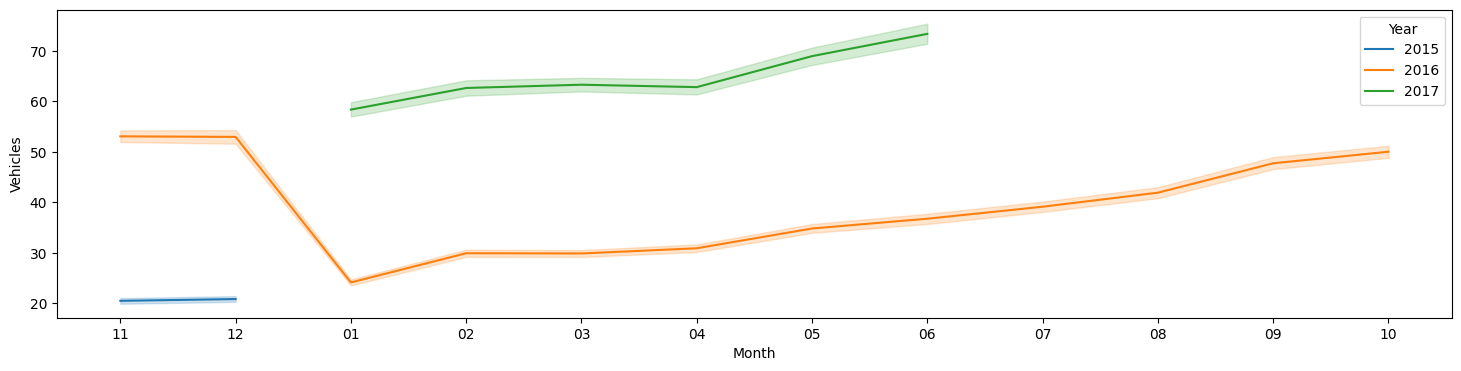

In [26]:
f, ax = plt.subplots(figsize=(18, 4))
sns.lineplot(data=df_junc1, y='Vehicles', x='Month', hue='Year')
plt.show()

In [27]:
df_copy = df.copy()

In [28]:
df_copy = df_copy.drop(columns=['DateTime','Time','Month-Day'])

In [29]:
df_copy['Year'] = df_copy['Year'].astype('int32')
df_copy['Month'] = df_copy['Month'].astype('int32')
df_copy['Day'] = df_copy['Day'].astype('int32')

#### Heatmap of correlation

<Axes: >

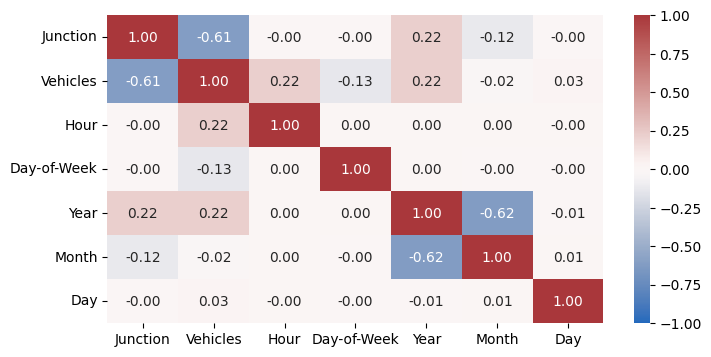

In [30]:
plt.figure(figsize=(8, 4))
sns.heatmap(df_copy.corr(),  annot=True, fmt='.2f', cmap='vlag', vmin=-1, vmax=1)

##### Heatmap of Junction 1

In [31]:
junction_num_grouped = df_copy.groupby('Junction')
df_junc1_copy = junction_num_grouped.get_group(1).drop(columns='Junction')
df_junc2_copy = junction_num_grouped.get_group(2).drop(columns='Junction')
df_junc3_copy = junction_num_grouped.get_group(3).drop(columns='Junction')
df_junc4_copy = junction_num_grouped.get_group(4).drop(columns='Junction')

<Axes: >

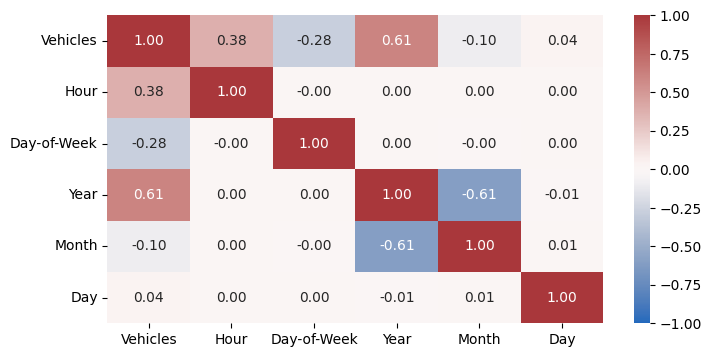

In [32]:
plt.figure(figsize=(8, 4))
sns.heatmap(df_junc1_copy.corr(),  annot=True, fmt='.2f', cmap='vlag', vmin=-1, vmax=1)

##### Random Forest Regressor Model Evaluation

In [72]:
def random_forest_eval(df):
    y = df["Vehicles"]
    X = df.drop(columns='Vehicles')
    scaler = StandardScaler() 
    df_scaled = pd.DataFrame(scaler.fit_transform(X))
    X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size = 0.2, random_state = 42)
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    return (mse, r2)

In [93]:
rf_full_df = random_forest_eval(df_copy)
rf_junc1 = random_forest_eval(df_junc1_copy)
rf_junc2 = random_forest_eval(df_junc2_copy)
rf_junc3 = random_forest_eval(df_junc3_copy)
rf_junc4 = random_forest_eval(df_junc4_copy)

print("Random Forest Regression Results")
print(f"Full data --> mse: {rf_full_df[0]}, r2 score: {rf_full_df[1]}")
print(f"Junction 1 --> mse: {rf_junc1[0]}, r2 score: {rf_junc1[1]}")
print(f"Junction 2 --> mse: {rf_junc2[0]}, r2 score: {rf_junc2[1]}")
print(f"Junction 3 --> mse: {rf_junc3[0]}, r2 score: {rf_junc3[1]}")
print(f"Junction 4 --> mse: {rf_junc4[0]}, r2 score: {rf_junc4[1]}")

Random Forest Regression Results
Full data --> mse: 12.639263663757273, r2 score: 0.9689869595286663
Junction 1 --> mse: 15.56239653991093, r2 score: 0.9701912190621951
Junction 2 --> mse: 5.102325522439192, r2 score: 0.9047621616969035
Junction 3 --> mse: 30.7244340870161, r2 score: 0.7209014031795145
Junction 4 --> mse: 6.813435673187572, r2 score: 0.5128956014780774


#### Polynomial Regression Model Evaluation

In [94]:
def polynomial_model(df):
    y = df["Vehicles"]
    X = df.drop(columns='Vehicles')
    scaler = StandardScaler() 
    df_scaled = pd.DataFrame(scaler.fit_transform(X))
    X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size = 0.2, random_state = 42)
    poly = PolynomialFeatures(degree = 4) 
    X_poly = poly.fit_transform(X_train)
    model = LinearRegression()
    model.fit(X_poly,y_train)
    X_test_poly = poly.transform(X_test)
    pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    return (mse, r2)

In [95]:
poly_df_full = polynomial_model(df_copy)
poly_junc1 = polynomial_model(df_junc1_copy)
poly_junc2 = polynomial_model(df_junc2_copy)
poly_junc3 = polynomial_model(df_junc3_copy)
poly_junc4 = polynomial_model(df_junc4_copy)

In [96]:
print("Polynomial Regression Results")
print(f"Full data --> mse: {poly_df_full[0]}, r2 score: {poly_df_full[1]}")
print(f"Junction 1 --> mse: {poly_junc1[0]}, r2 score: {poly_junc1[1]}")
print(f"Junction 2 --> mse: {poly_junc2[0]}, r2 score: {poly_junc2[1]}")
print(f"Junction 3 --> mse: {poly_junc3[0]}, r2 score: {poly_junc3[1]}")
print(f"Junction 4 --> mse: {poly_junc4[0]}, r2 score: {poly_junc4[1]}")

Polynomial Regression Results
Full data --> mse: 41.796853009592304, r2 score: 0.8974427997987079
Junction 1 --> mse: 47.07896819936367, r2 score: 0.909823230231046
Junction 2 --> mse: 7.8427200427699395, r2 score: 0.8536111230055923
Junction 3 --> mse: 66.87979548789737, r2 score: 0.39246864487566524
Junction 4 --> mse: 7.679502926329214, r2 score: 0.45097894317876597


#### XGBoost Model Evaluation

In [ ]:
def xgboost_model(df):
    y = df["Vehicles"]
    X = df.drop(columns='Vehicles')
    regressor=xgb.XGBRegressor(eval_metric='rmsle')
    param_grid = {"max_depth":    [4, 5],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}
    grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, n_jobs=-1)
    scaler = StandardScaler() 
    df_scaled = pd.DataFrame(scaler.fit_transform(X))
    X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size = 0.2, random_state = 42)
    grid_search.fit(X_train, y_train)
    
    model = xgb.XGBRegressor(learning_rate= grid_search.best_params_['learning_rate'],
                max_depth=grid_search.best_params_['max_depth'],
                n_estimators = grid_search.best_params_['n_estimators'], 
                seed = 42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    return (mse, r2)

In [117]:
xgb_df_full = xgboost_model(df_copy)
xgb_junc1 = xgboost_model(df_junc1_copy)
xgb_junc2 = xgboost_model(df_junc2_copy)
xgb_junc3 = xgboost_model(df_junc3_copy)
xgb_junc4 = xgboost_model(df_junc4_copy)

In [118]:
print("XGBoost Regression Results")
print(f"Full data --> mse: {xgb_df_full[0]}, r2 score: {xgb_df_full[1]}")
print(f"Junction 1 --> mse: {xgb_junc1[0]}, r2 score: {xgb_junc1[1]}")
print(f"Junction 2 --> mse: {xgb_junc2[0]}, r2 score: {xgb_junc2[1]}")
print(f"Junction 3 --> mse: {xgb_junc3[0]}, r2 score: {xgb_junc3[1]}")
print(f"Junction 4 --> mse: {xgb_junc4[0]}, r2 score: {xgb_junc4[1]}")

XGBoost Regression Results
Full data --> mse: 27.08977949544147, r2 score: 0.9335296382604392
Junction 1 --> mse: 19.38231805774552, r2 score: 0.9628744023088939
Junction 2 --> mse: 5.214722032528236, r2 score: 0.9026642162391673
Junction 3 --> mse: 48.47958658496223, r2 score: 0.559614847519092
Junction 4 --> mse: 6.755071586727696, r2 score: 0.5170681518027536
